## BUAN 6340.001 - Programming for Data Science - S24

# 2015 Predicting Flight Delays and Cancellations

### Problem Statement:

Flight delays and cancellations greatly disrupt air travelers, resulting in missed flights, lost time, and unexpected overnight stays. This project seeks to leverage the U.S. Department of Transportation's 2015 data on flight performance to ascertain:

- The airlines and airports with the highest and lowest on-time arrival rates, empowering travelers to choose the most dependable airlines and routes.
- The variables that contribute most substantially to delays, such as time of day, airport, airline, etc., thus identifying systemic sources of delays.
- The efficacy of using regression models to accurately forecast flight delays, which would enable travelers to judiciously arrange connections and plans.

### Dataset:
Data Source : https://www.kaggle.com/datasets/usdot/flight-delays/data 

Data Attributes :
- There are 3 files having airlines, airport and flight details respectively.
- The number of columns are 40 with flights.csv file having 1048576 records.

The key dataset for this project is the 2015 Flight Delays and Cancellations dataset published by the US Department of Transportation's Bureau of Transportation Statistics. This contains summary statistics on the on-time performance, delays, cancellations, and diversions for domestic US flights by major air carriers. Important fields include:
- Date, airline, origin, destination
- Numbers of on-time, delayed, canceled, and diverted flights
- Lengths of departure and arrival delays


### Data Overview:
Each entry of the flights.csv file corresponds to a flight; more than 5,800,000 flights were recorded in 2015. These flights are described according to 31 variables. 
- YEAR, MONTH, DAY, DAY_OF_WEEK: dates of the flight
- AIRLINE: An identification number assigned by the US DOT to identify a unique airline
- ORIGIN_AIRPORT and DESTINATION_AIRPORT: code attributed by IATA to identify the airports
- SCHEDULED_DEPARTURE and SCHEDULED_ARRIVAL: scheduled times of take-off and landing
- DEPARTURE_TIME and ARRIVAL_TIME: accurate times at which take-off and landing took place
- DEPARTURE_DELAY and ARRIVAL_DELAY: difference (in minutes) between planned and real times
- DISTANCE: distance (in miles)
An additional file of this dataset, the airports.csv file, gives a more exhaustive description of the airports.


### Steps To Be Taken

**Data Cleaning:**
- Handle missing, inconsistent or erroneous records 
- Normalize date formats 
- Add supplemental datasets on airport locations, airline hub cities etc.

**Exploratory Analysis:** 
- Statistical overview of flights, delays and cancellations by airline, airport 
- Visualizations of delays by time of day, date, location 
- Identify most delayed/on-time airlines and airports

**In-depth Analysis:** 
- Correlate delays with weather, airplane types, distances 
- Model delay likelihood with regressions using factors like airline, origin airport 
- Test predictive accuracy on held-out part of dataset

**Predictive Models:**
- Implementation of predictive models for various scenarios (airline-specific, all airports, destination-specific). 
- Evaluation metrics and performance assessment for each model.

**Recommendations**
- Report ranking airlines by on-time performance 
- Identify systematic factors contributing to delays 
- Provide delay predictions to help travelers plan appropriately


In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar # Used in the Bar chart (Months)

### Reading the DATA SET


In this notebook, I developed a model to predict flight delays and cancellation reasons at destination airports. The objective is to construct a dataset suitable for both visualization and predictive modeling, enabling effective delay forecasts.

**Technical aspect Covered:**

**Visualization:** Utilizing libraries such as Matplotlib and Seaborn to generate insightful plots, which help in understanding the underlying trends and patterns within the data.

**data manipulation:** pandas, numpy

**modeling:** sklearn

**class definition:** regression, Boosting, Bagging

For exploratory data analysis (EDA), Python was used extensively to derive initial insights and identify key variables that influence flight delays. Various plots were created to visualize these relationships clearly. Additionally, feature scaling methods were applied to normalize the range of independent variables, preparing the data for more effective modeling. The dataset was split into training and testing sets to validate the predictive performance of the models on unseen data.



In [2]:
data = pd.read_csv("flights.csv", low_memory=False)

In [3]:
airport = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [5]:
data.shape

(5819079, 31)

The Data Contains 31 columns and 1048575 Rows

In [6]:
data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [7]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


From the above table it is clear that data is not properly organised and date is given seperated and many columns have unnecessary data not useful for visualization for which it is required that we clean the data and take only those columns which is of our use.

In [10]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [11]:
airport = airport.dropna(subset = ['LATITUDE','LONGITUDE'])

In [12]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [13]:
airport.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [14]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [15]:
Data_NULL = data.isnull().sum()*100/data.shape[0]
Data_NULL

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

-


**We can see that 96% of the values in Cancellation reason column are null for which it is of less use while predicting Delays. Some other columns include 78.2% in Air System Delay, Security Delay, Airline Delay, Weather Delay etc. So I am going to create two Dataset which is having no null values one is by removing all the null values irrespective of different types of Delays and other I am going to take the data set with respect to different types of delays. The first Dataset is named as Flights and the other one is named as Flight_Delays.**

In [16]:
# Dropping of subset of null values
data1 = data.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
             'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [17]:
data1.shape

(5714008, 31)

In [18]:
data1.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5714008
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
dtype: int64

In [19]:
# Creting Dataset w.r.t different Types of Delays
data11 = data1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
data11 = data11.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [20]:
data11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063439 entries, 27 to 5819071
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   AIRLINE              1063439 non-null  object 
 1   ORIGIN_AIRPORT       1063439 non-null  object 
 2   DESTINATION_AIRPORT  1063439 non-null  object 
 3   DEPARTURE_DELAY      1063439 non-null  float64
 4   TAXI_OUT             1063439 non-null  float64
 5   ELAPSED_TIME         1063439 non-null  float64
 6   DISTANCE             1063439 non-null  int64  
 7   TAXI_IN              1063439 non-null  float64
 8   ARRIVAL_DELAY        1063439 non-null  float64
 9   AIR_SYSTEM_DELAY     1063439 non-null  float64
 10  SECURITY_DELAY       1063439 non-null  float64
 11  AIRLINE_DELAY        1063439 non-null  float64
 12  LATE_AIRCRAFT_DELAY  1063439 non-null  float64
 13  WEATHER_DELAY        1063439 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage:

In [21]:
# The other Dataset
Flight_Delays = data11

In [22]:
# Creating Dataset by removing null values by not focussing fully on different types of Delays
data2 = data1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [23]:
data2.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [24]:
data2.shape

(5714008, 25)

In [25]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 25 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [26]:
data2.DEPARTURE_TIME.isnull().sum()

0

In [27]:
data2.DEPARTURE_TIME.dtype

dtype('float64')

In [28]:
data2.DEPARTURE_TIME

0          2354.0
1             2.0
2            18.0
3            15.0
4            24.0
            ...  
5819074    2355.0
5819075    2355.0
5819076    2350.0
5819077    2353.0
5819078      14.0
Name: DEPARTURE_TIME, Length: 5714008, dtype: float64

The departure time above is not very much informative so we are going to change it in the datetime format so that we get a better idea of the time.

In [29]:
# Creating a function to change the way of representation of time in the column
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [30]:
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Actual_Departure']

0          23:54:00
1          00:02:00
2          00:18:00
3          00:15:00
4          00:24:00
             ...   
5819074    23:55:00
5819075    23:55:00
5819076    23:50:00
5819077    23:53:00
5819078    00:14:00
Name: Actual_Departure, Length: 5714008, dtype: object

In [31]:
data2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Actual_Departure'],
      dtype='object')

In [32]:
# Creating Date in the Datetime format
data2['Date'] = pd.to_datetime(data2[['YEAR','MONTH','DAY']])
data2.Date

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
5819074   2015-12-31
5819075   2015-12-31
5819076   2015-12-31
5819077   2015-12-31
5819078   2015-12-31
Name: Date, Length: 5714008, dtype: datetime64[ns]

In [33]:
data2['Day'] = data2['Date'].dt.day_name()

In [34]:
# Applying the function to required variables in the dataset
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Scheduled_Arrival'] =data1['SCHEDULED_ARRIVAL'].apply(Format_Hourmin)
data2['Scheduled_Departure'] =data1['SCHEDULED_DEPARTURE'].apply(Format_Hourmin)
data2['Actual_Arrival'] =data1['ARRIVAL_TIME'].apply(Format_Hourmin)










# Merging of  3 data sets

Since there are three dataset it is required to merge all the three data set so that we can use it during the visualization in a proper way.

In [35]:
print("Columns in data2:", data2.columns)
print("Columns in airlines:", airlines.columns)

Columns in data2: Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Actual_Departure', 'Date',
       'Day', 'Scheduled_Arrival', 'Scheduled_Departure', 'Actual_Arrival'],
      dtype='object')
Columns in airlines: Index(['IATA_CODE', 'AIRLINE'], dtype='object')


In [36]:
# Merging on AIRLINE and IATA_CODE
data2 = data2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [37]:
data2 = data2.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [38]:
data2 = data2.rename(columns={"AIRLINE_y":"AIRLINE"})

In [39]:
data2 = data2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
data2 = data2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [40]:
data2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'Actual_Departure', 'Date', 'Day',
       'Scheduled_Arrival', 'Scheduled_Departure', 'Actual_Arrival', 'AIRLINE',
       'IATA_CODE_x', 'AIRPORT_x', 'CITY_x', 'STATE_x', 'COUNTRY_x',
       'LATITUDE_x', 'LONGITUDE_x', 'IATA_CODE_y', 'AIRPORT_y', 'CITY_y',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [41]:
data2 = data2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)

In [42]:
data2 = data2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [43]:
data2

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,Dest_Airport_Code,Dest_Airport_Name,Destination_city
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,04:30:00,00:05:00,04:08:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
1,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,05:09:00,00:45:00,04:55:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
2,2015,1,1,4,134,N464AS,ANC,SEA,155,140.0,...,06:33:00,01:55:00,05:58:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
3,2015,1,1,4,114,N303AS,ANC,SEA,220,209.0,...,06:40:00,02:20:00,06:28:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
4,2015,1,1,4,730,N423AS,ANC,SEA,505,457.0,...,09:30:00,05:05:00,09:16:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,2015,12,29,2,2734,N884AS,MEI,PIB,2046,2037.0,...,21:20:00,20:46:00,21:02:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
5221996,2015,12,30,3,2730,N880AS,MEI,PIB,1435,1616.0,...,15:09:00,14:35:00,16:39:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
5221997,2015,12,30,3,2734,N907EV,MEI,PIB,2046,2056.0,...,21:20:00,20:46:00,21:30:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
5221998,2015,12,31,4,2730,N907EV,MEI,PIB,1435,1421.0,...,15:09:00,14:35:00,14:51:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel


In [44]:
# we are taking the required data into Account for visualization and the Analysis
ReqdData = pd.DataFrame(data2[['AIRLINE','Org_Airport_Name','Origin_city',
                               'Dest_Airport_Name','Destination_city','ORIGIN_AIRPORT',
                               'DESTINATION_AIRPORT','DISTANCE','Actual_Departure','Date','Day',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','DIVERTED',]])

In [45]:
data2.DEPARTURE_TIME.dtype

dtype('float64')

In [46]:
ReqdData = ReqdData.dropna(subset = ['Actual_Departure','Actual_Arrival'])

In [47]:
ReqdData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5219244 entries, 0 to 5221999
Data columns (total 22 columns):
 #   Column               Dtype         
---  ------               -----         
 0   AIRLINE              object        
 1   Org_Airport_Name     object        
 2   Origin_city          object        
 3   Dest_Airport_Name    object        
 4   Destination_city     object        
 5   ORIGIN_AIRPORT       object        
 6   DESTINATION_AIRPORT  object        
 7   DISTANCE             int64         
 8   Actual_Departure     object        
 9   Date                 datetime64[ns]
 10  Day                  object        
 11  Scheduled_Departure  object        
 12  DEPARTURE_DELAY      float64       
 13  Actual_Arrival       object        
 14  Scheduled_Arrival    object        
 15  ARRIVAL_DELAY        float64       
 16  SCHEDULED_TIME       float64       
 17  ELAPSED_TIME         float64       
 18  AIR_TIME             float64       
 19  TAXI_IN              

In [48]:
# Cleaned Dataset for visualization and Analysis
Flights = ReqdData
Flights

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204.0,194.0,173.0,4.0,17.0,0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218.0,198.0,170.0,11.0,17.0,0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200.0,199.0,176.0,8.0,15.0,0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,04:57:00,2015-01-01,...,-8.0,09:16:00,09:30:00,-14.0,205.0,199.0,179.0,4.0,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69,20:37:00,2015-12-29,...,-9.0,21:02:00,21:20:00,-18.0,34.0,25.0,17.0,2.0,6.0,0
5221996,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69,16:16:00,2015-12-30,...,101.0,16:39:00,15:09:00,90.0,34.0,23.0,14.0,5.0,4.0,0
5221997,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69,20:56:00,2015-12-30,...,10.0,21:30:00,21:20:00,10.0,34.0,34.0,18.0,4.0,12.0,0
5221998,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69,14:21:00,2015-12-31,...,-14.0,14:51:00,15:09:00,-18.0,34.0,30.0,18.0,3.0,9.0,0


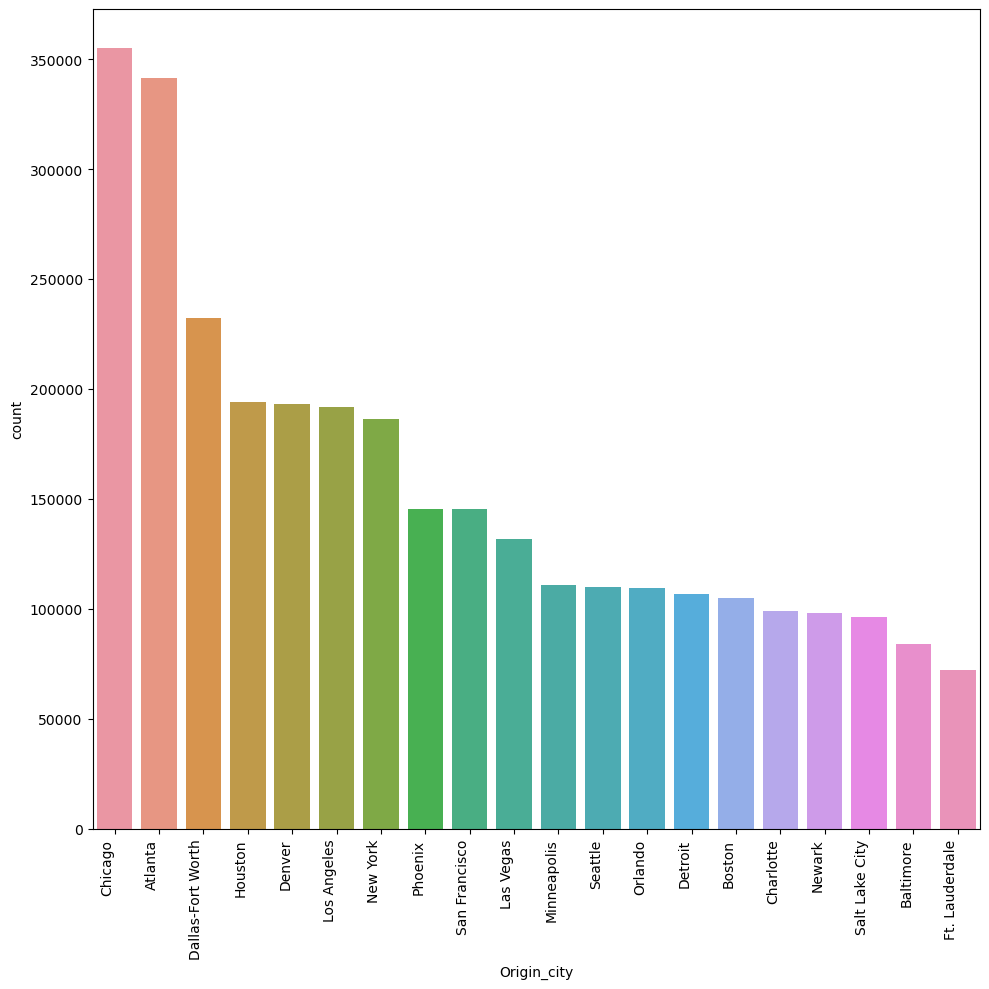

In [49]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['Origin_city'], data = Flights,
              order=Flights['Origin_city'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

# The Figure shows that Chicago has the highest count of flight from origin city 

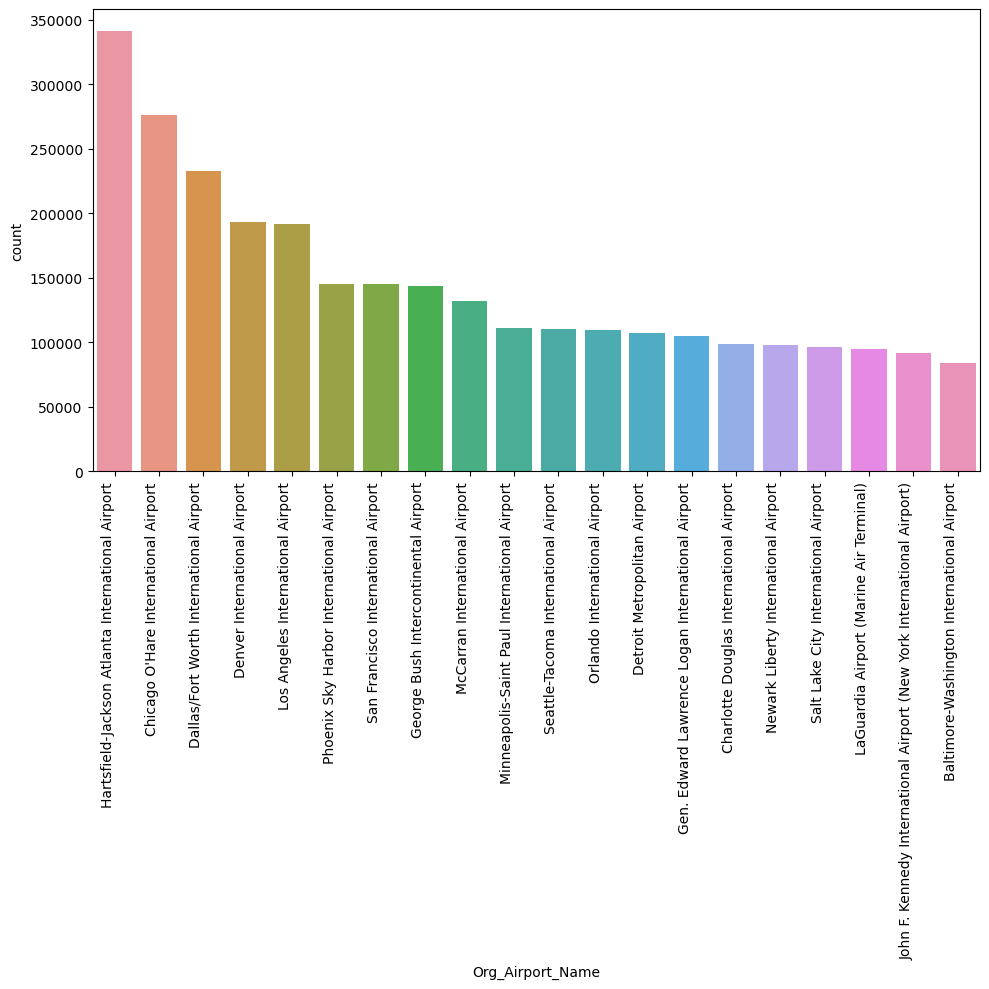

In [50]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['Org_Airport_Name'], data = Flights,
              order=Flights['Org_Airport_Name'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [51]:
data['CANCELLATION_REASON']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
5819074    NaN
5819075    NaN
5819076    NaN
5819077    NaN
5819078    NaN
Name: CANCELLATION_REASON, Length: 5819079, dtype: object

# Checking about flight cancellation

In [52]:
# Replace to be readable in the chart
data['CANCELLATION_REASON'] = data['CANCELLATION_REASON'].replace({'A':'Mechanical Issues','B':'Weather','C':'Air traffic restrictions', 'D':'Other'})
data['CANCELLATION_REASON']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
5819074    NaN
5819075    NaN
5819076    NaN
5819077    NaN
5819078    NaN
Name: CANCELLATION_REASON, Length: 5819079, dtype: object

In [53]:
df2 = data[['YEAR', 'MONTH', 'DAY', 'AIRLINE','FLIGHT_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','CANCELLED','CANCELLATION_REASON']]
CHECK_CANCELLED = df2[(df2['CANCELLED']!=0)]
CHECK_CANCELLED

,YEAR,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLED,CANCELLATION_REASON
32,2015,1,1,AS,136,ANC,SEA,1,Mechanical Issues
42,2015,1,1,AA,2459,PHX,DFW,1,Weather
68,2015,1,1,OO,5254,MAF,IAH,1,Weather
82,2015,1,1,MQ,2859,SGF,DFW,1,Weather
90,2015,1,1,OO,5460,RDD,SFO,1,Mechanical Issues
...,...,...,...,...,...,...,...,...,...
5818090,2015,12,31,UA,1789,IAH,TPA,1,Mechanical Issues
5818157,2015,12,31,UA,222,SFO,LAX,1,Mechanical Issues
5818318,2015,12,31,AA,2245,MIA,SAN,1,Mechanical Issues
5818777,2015,12,31,NK,416,FLL,IAG,1,Mechanical Issues


In [54]:
# Grouping based on (CANCELLATION_REASON)
grouped = CHECK_CANCELLED.groupby('CANCELLATION_REASON').size().reset_index(name='count')
grouped


,CANCELLATION_REASON,count
0,Air traffic restrictions,15749
1,Mechanical Issues,25262
2,Other,22
3,Weather,48851


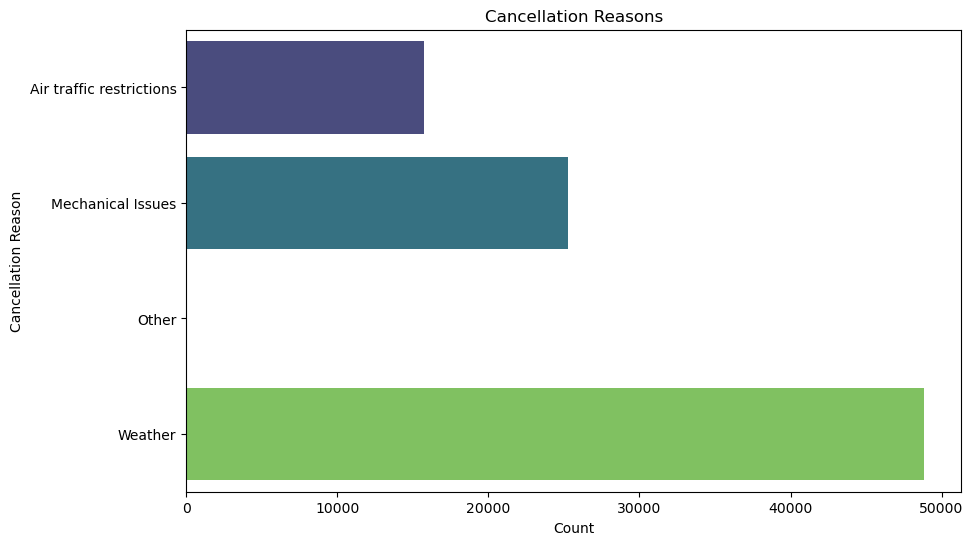

In [55]:
# Grouping based on (CANCELLATION_REASON)
grouped = CHECK_CANCELLED.groupby('CANCELLATION_REASON').size().reset_index(name='count')

# Horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='count', y='CANCELLATION_REASON', data=grouped, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Cancellation Reason')
plt.title('Cancellation Reasons')

plt.show()

- The dataset identifies weather as the most common reason for flight cancellations, with 48,851 cancellations recorded. These cancellations occur when adverse weather conditions make flight operations unsafe or impractical. Other reasons include mechanical issues, air traffic restrictions, and operational challenges. These cancellations have significant implications for passengers, airlines, and the aviation ecosystem, leading to inconvenience, missed connections, financial losses, and disruptions to supply chains and travel plans. Mitigation strategies include proactive communication, alternative flight rebooking, compensation for affected travelers, and optimizing operational procedures to enhance resilience and adaptability to adverse conditions.

# Observation: The weather is the top reason for cancellations.

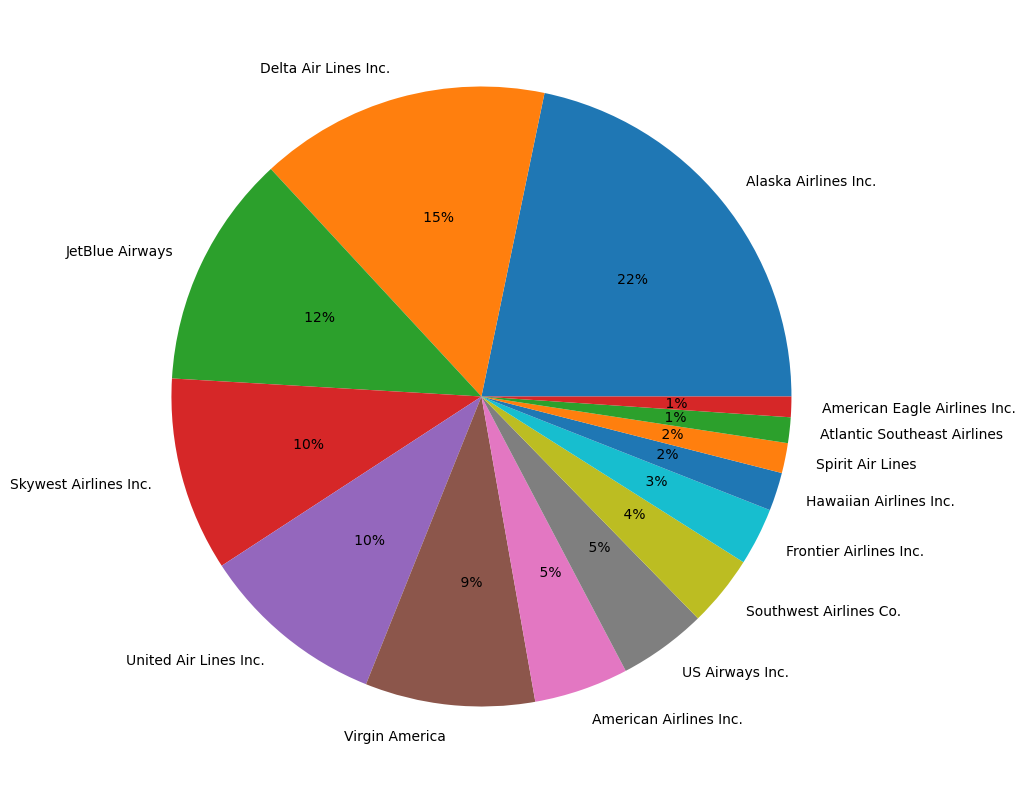

In [57]:
axis = plt.subplots(figsize=(10,14))
Name = Flights["AIRLINE"].unique()
size = Flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

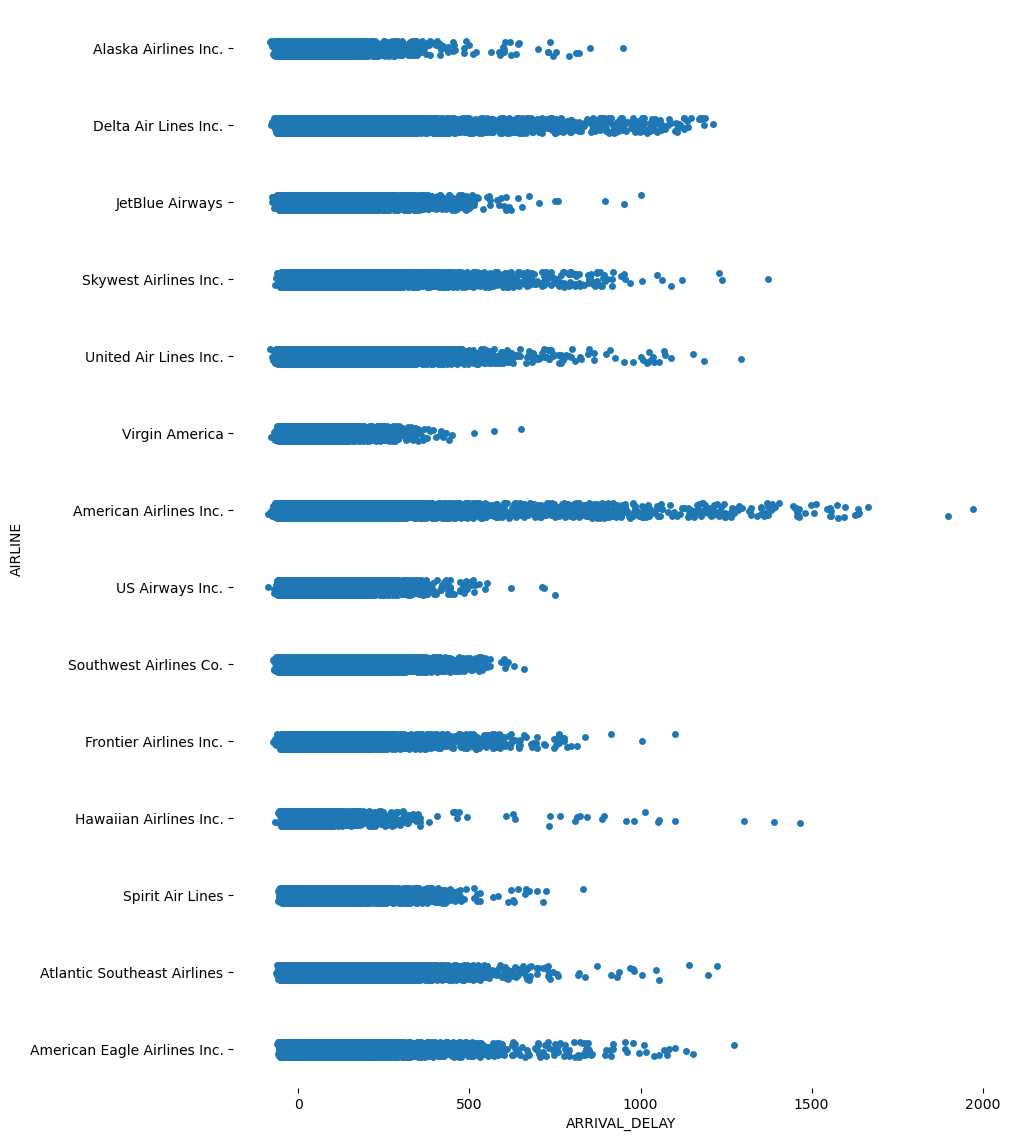

In [58]:
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data = Flights, dodge=True, jitter=True
            )
plt.show()

### Arrival Delay vs. Airline Scatter Plot:
The scatter plot visually represents the relationship between Arrival Delays and different airlines. By plotting the Arrival Delay on the y-axis and airlines on the x-axis, each point represents the average or total Arrival Delay for a specific airline. The scatter plot shows that American Airlines Inc. has the highest Arrival Delay compared to other airlines. This indicates that flights operated by American Airlines Inc. tend to experience longer delays upon arrival.

# American Airlines Inc has the highest Arrival Delay.

[Text(0.5, 0, 'TAXI_TIME (TAXI_OUT: green, TAXI_IN: blue)')]

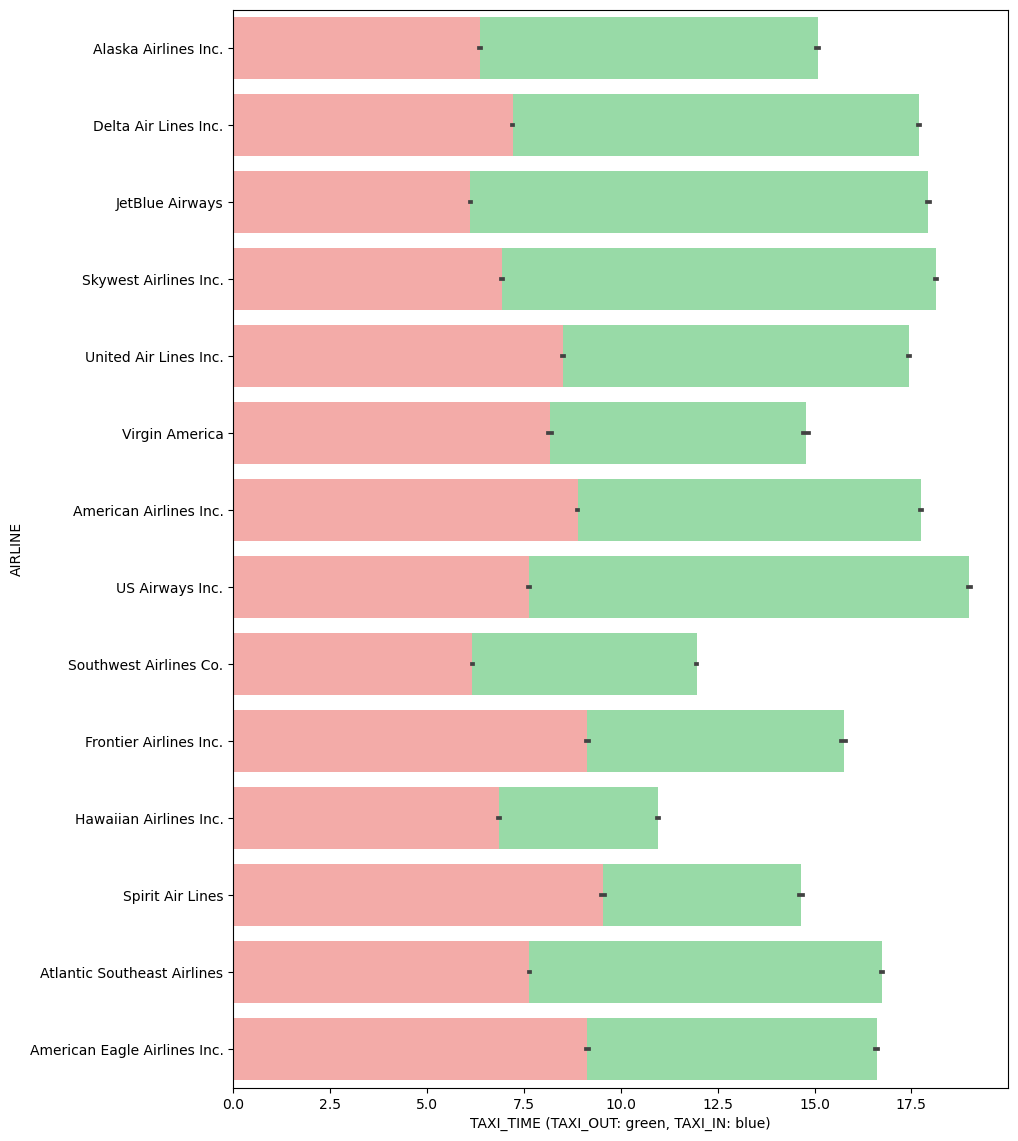

In [59]:
# Plot to show the Taxi In and Taxi Out Time
axis = plt.subplots(figsize=(10,14))
sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
axis = sns.barplot(x="TAXI_OUT", y="AIRLINE", data=Flights, color="g")
axis = sns.barplot(x="TAXI_IN", y="AIRLINE", data=Flights, color="r")
axis.set(xlabel="TAXI_TIME (TAXI_OUT: green, TAXI_IN: blue)")

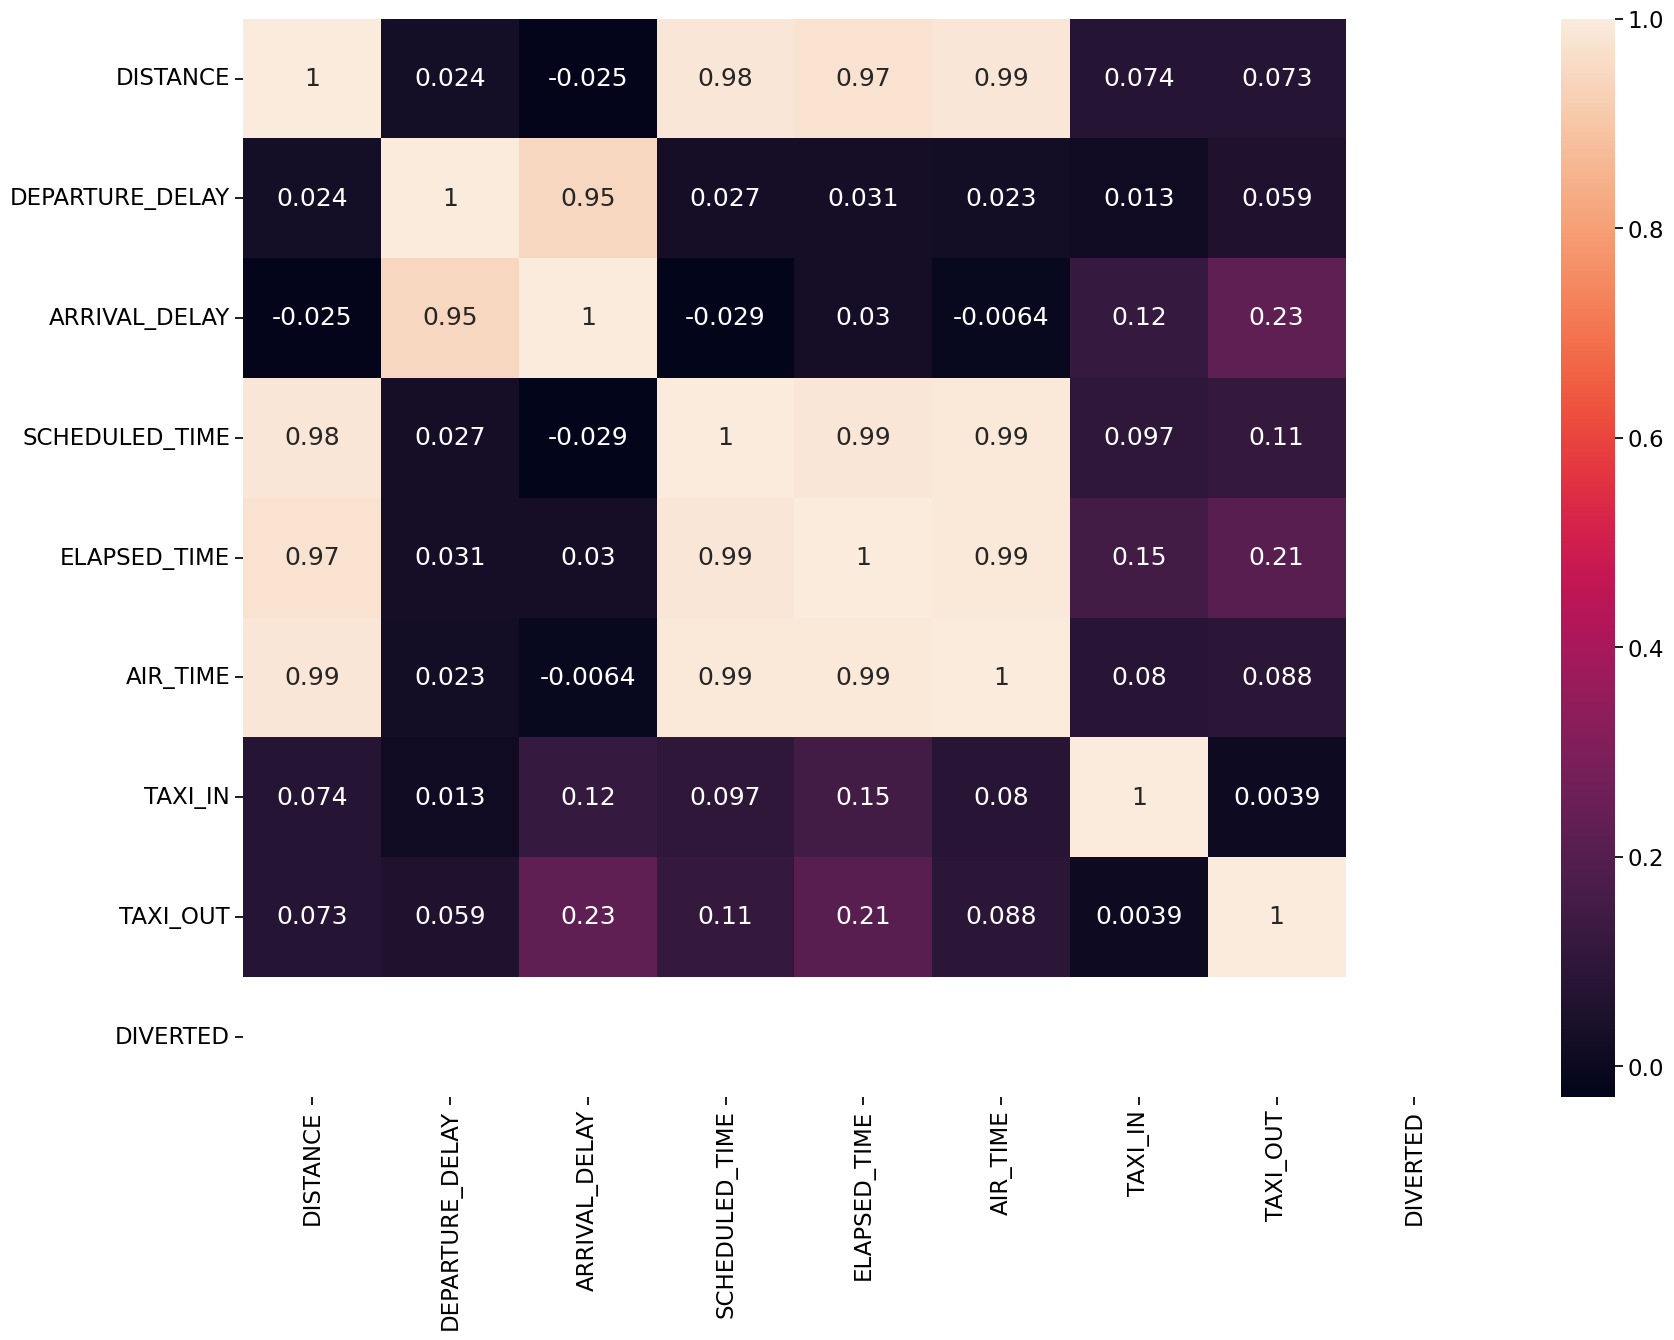

In [60]:
axis = plt.subplots(figsize=(20, 14))
sns.heatmap(Flights.corr(numeric_only=True), annot=True)
plt.show()

## Very High Correlation Between Arrival Delay and Departure Delay

- Strong Correlation between Arrival Delay and Departure Delay: The strong positive correlation between arrival and departure delays suggests that flights departing late from their origins are more likely to arrive late at their destinations.
- Identifying Main Reasons for Departure Delays: The heatmap analysis highlights the need to investigate departure delays at origin airports, including security checks, air traffic congestion, aircraft maintenance issues, weather conditions, and operational inefficiencies.
- Correlation among Flight Features: The strong positive correlation between flight features like Scheduled Time, Elapsed Time, Airtime, and Taxi In indicates that longer flights often result in longer elapsed and taxi times.
- Weak Positive Correlation between Arrival Delay and Taxi Out: The weak positive correlation between arrival delay and taxi out suggests longer taxi-out times may cause arrival delays, though to a lesser extent.

# Prediction

In [61]:
Flights.head()

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204.0,194.0,173.0,4.0,17.0,0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218.0,198.0,170.0,11.0,17.0,0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200.0,199.0,176.0,8.0,15.0,0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,04:57:00,2015-01-01,...,-8.0,09:16:00,09:30:00,-14.0,205.0,199.0,179.0,4.0,16.0,0


In [62]:
# Dropping unncecssary columns before prediction
Flights1 = Flights.drop(['Org_Airport_Name','Origin_city','Dest_Airport_Name','Destination_city'],axis = 1)

In [63]:
Flights1.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE',
       'Actual_Departure', 'Date', 'Day', 'Scheduled_Departure',
       'DEPARTURE_DELAY', 'Actual_Arrival', 'Scheduled_Arrival',
       'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'TAXI_IN', 'TAXI_OUT', 'DIVERTED'],
      dtype='object')

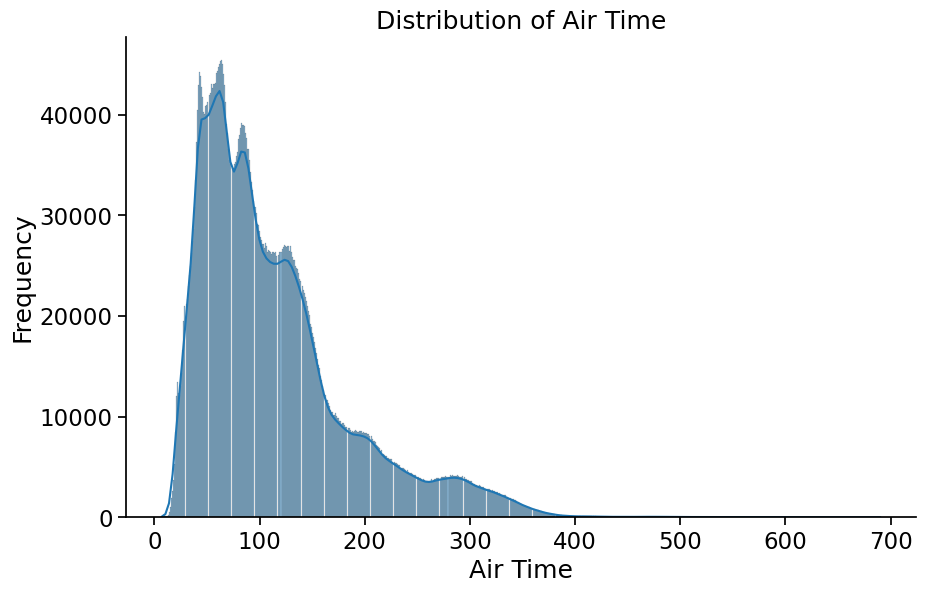

In [87]:
# To check the Distribution of Air Time
sns.displot(data=Flights1['AIR_TIME'], kde=True, height=6, aspect=1.6)
plt.title('Distribution of Air Time')
plt.xlabel('Air Time')
plt.ylabel('Frequency')
plt.show()

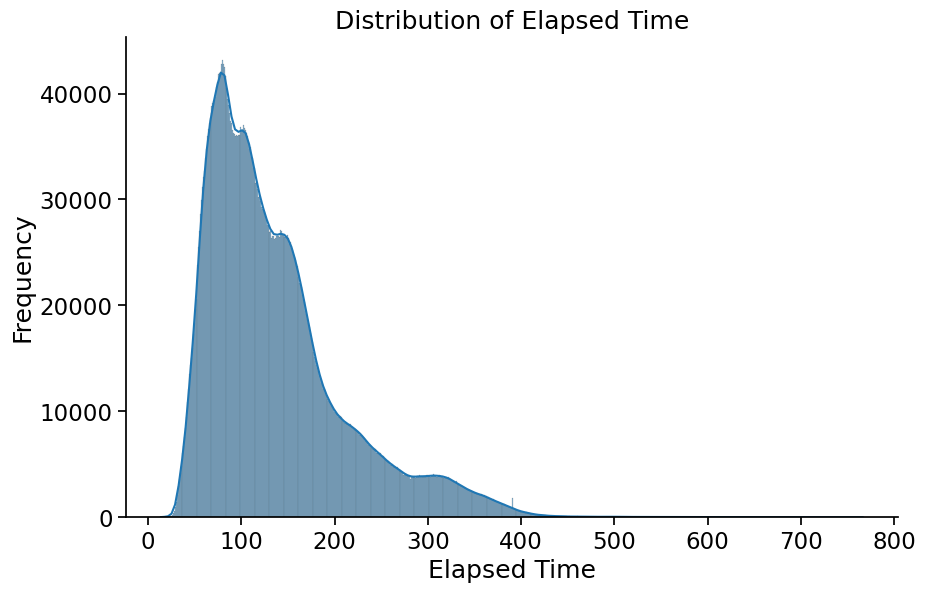

In [65]:
sns.displot(Flights1['ELAPSED_TIME'], kind="hist", kde=True, height=6, aspect=1.6)
plt.title('Distribution of Elapsed Time')
plt.xlabel('Elapsed Time')
plt.ylabel('Frequency')
plt.show()

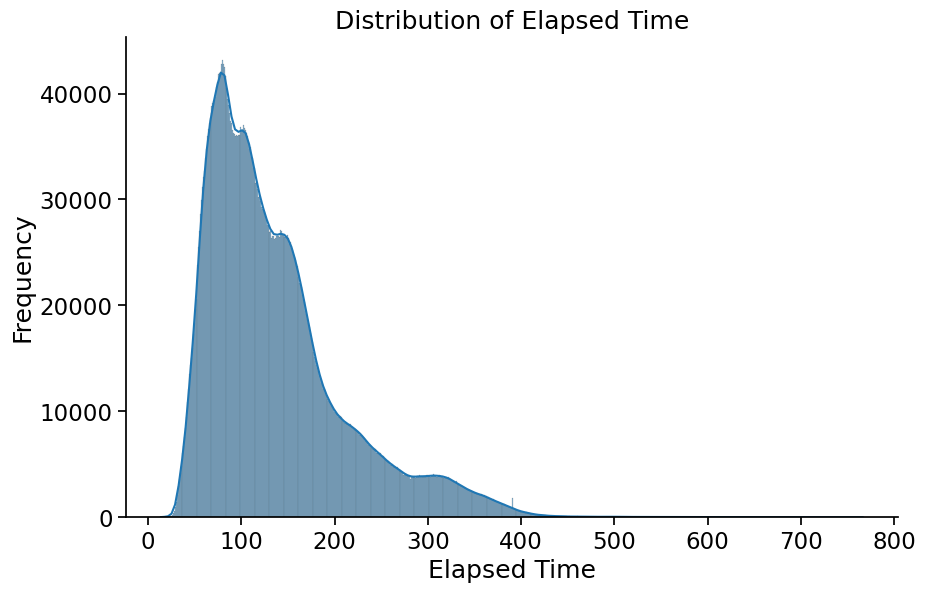

In [90]:
# To check the Distribution of Elapsed Time
sns.displot(data=Flights1['ELAPSED_TIME'], kind="hist", kde=True, height=6, aspect=1.6)
plt.title('Distribution of Elapsed Time')
plt.xlabel('Elapsed Time')
plt.ylabel('Frequency')
plt.show()

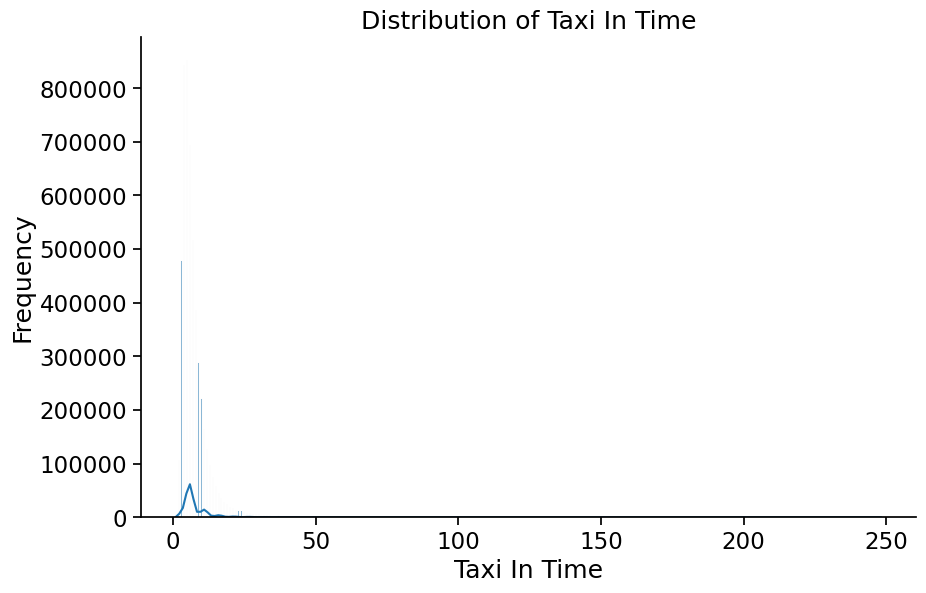

In [91]:
# To check the Distribution of Taxi IN
sns.displot(data=Flights1['TAXI_IN'], kind="hist", kde=True, height=6, aspect=1.6)

plt.title('Distribution of Taxi In Time')
plt.xlabel('Taxi In Time')
plt.ylabel('Frequency')

plt.show()

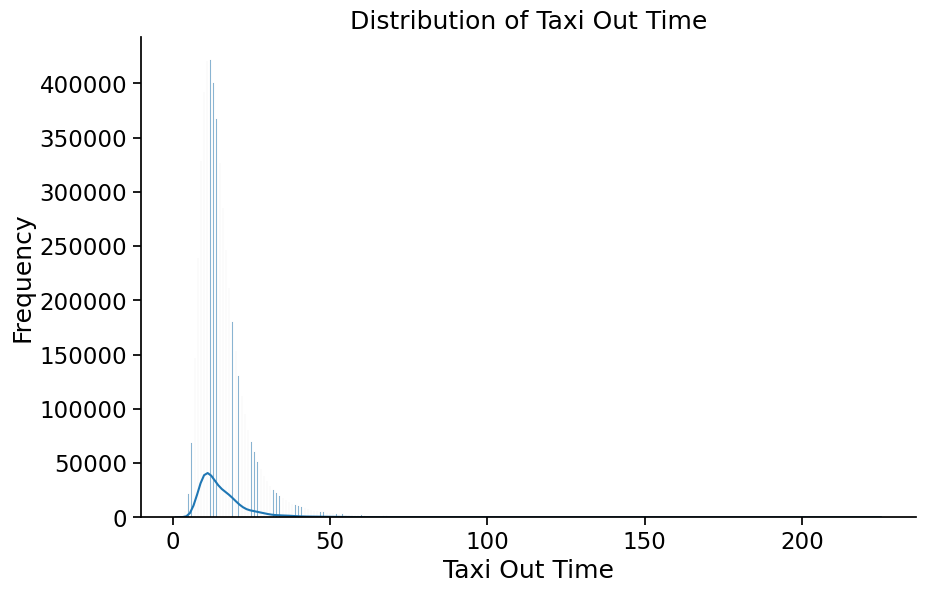

In [92]:
# To check the Distribution of Taxi out
sns.displot(data=Flights1['TAXI_OUT'], kind="hist", kde=True, height=6, aspect=1.6)

plt.title('Distribution of Taxi Out Time')
plt.xlabel('Taxi Out Time')
plt.ylabel('Frequency')

plt.show()

### Modeling Techniques:
We trained and evaluated multiple regression models on the same dataset using performance metrics such as Mean Absolute, Mean Squared, Root Mean Squared, and R-squared scores. 
Iterating over the list of models and their corresponding names will allow us to compare the performance of different models.

We conducted a comparative analysis of multiple regression models using various performance metrics.
- Selecting Models: We started by choosing multiple regression models we wanted to compare. This could include popular choices like Linear Regression, Ridge Regression, Lasso Regression, Random Forest regression, etc. Each model came with its assumptions, strengths, and weaknesses.
- Training the Models: Next, we trained each selected regression model on the same dataset. This ensured that the models were all exposed to the same patterns and relationships within the data.
- Evaluating Performance: After training, we evaluated the performance of each model using a set of performance metrics. The metrics mentioned are commonly used to assess regression models.
- Mean Absolute Error (MAE): Measures the average absolute difference between the predicted and actual values. Lower values indicate better performance.
 - Mean Squared Error (MSE): Measures the average of the squares of the errors. It penalizes larger errors more than MAE.
- Root Mean Squared Error (RMSE): The square root of MSE. It's in the same unit as the target variable and provides a more interpretable measure of error.
- R-squared (R2) Score: Represents the proportion of variance in the dependent variable that is predictable from the independent variables. A higher R2 score indicates a better fit.
- Comparing Results: By iterating over the list of models and their corresponding names, we could directly compare the performance of each model across the different metrics. This comparison allowed us to identify which model performs best according to the chosen evaluation criteria.
- Interpreting Results: We concluded each model's relative strengths and weaknesses based on the performance metrics. For example, a model with lower MAE, MSE, and RMSE values and higher R2 scores would generally be considered superior regarding predictive accuracy and fit to the data.
- Decision Making: Armed with this comparative analysis, you can decide which regression model suits your specific problem and requirements. Consider model complexity, interpretability, computational efficiency, and performance metrics.


In [69]:
# importing Various regression algorithms 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [70]:
Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)
Boost_Lin = AdaBoostRegressor(estimator=LinR,random_state=2)
Boost_las = AdaBoostRegressor(estimator=Las,random_state=2)
Boost_rid = AdaBoostRegressor(estimator=Rid,random_state=2)
Bg_Lin = BaggingRegressor(estimator=LinR,random_state=2)
Bg_las = BaggingRegressor(estimator=Las,random_state=2)
Bg_rid = BaggingRegressor(estimator=Rid,random_state=2)

In [71]:
le = LabelEncoder()

In [72]:
# Label encoding features to change categorical variables into numerical one
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])
Flights1['Day'] = le.fit_transform(Flights1['Day'])

In [73]:
Flights1 = Flights1.drop(['Scheduled_Departure','Scheduled_Arrival','Actual_Arrival','Date','Actual_Departure'], axis = 1)

In [74]:
Flights1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5219244 entries, 0 to 5221999
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   AIRLINE              int64  
 1   ORIGIN_AIRPORT       int64  
 2   DESTINATION_AIRPORT  int64  
 3   DISTANCE             int64  
 4   Day                  int64  
 5   DEPARTURE_DELAY      float64
 6   ARRIVAL_DELAY        float64
 7   SCHEDULED_TIME       float64
 8   ELAPSED_TIME         float64
 9   AIR_TIME             float64
 10  TAXI_IN              float64
 11  TAXI_OUT             float64
 12  DIVERTED             int64  
dtypes: float64(7), int64(6)
memory usage: 557.5 MB


In [75]:
X = Flights1.drop('ARRIVAL_DELAY',axis = 1)
X.shape

(5219244, 12)

In [76]:
y = Flights1['ARRIVAL_DELAY']
y.head()

0   -22.0
1   -14.0
2   -35.0
3   -12.0
4   -14.0
Name: ARRIVAL_DELAY, dtype: float64

In [77]:
# Splitting into train and test data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [78]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

# When Flight_Delays is taken, where I took all the different Delays into Concern.

I removed the null values present in all the different types of Delays and proceeded with prediction of the Arrival Delays. 

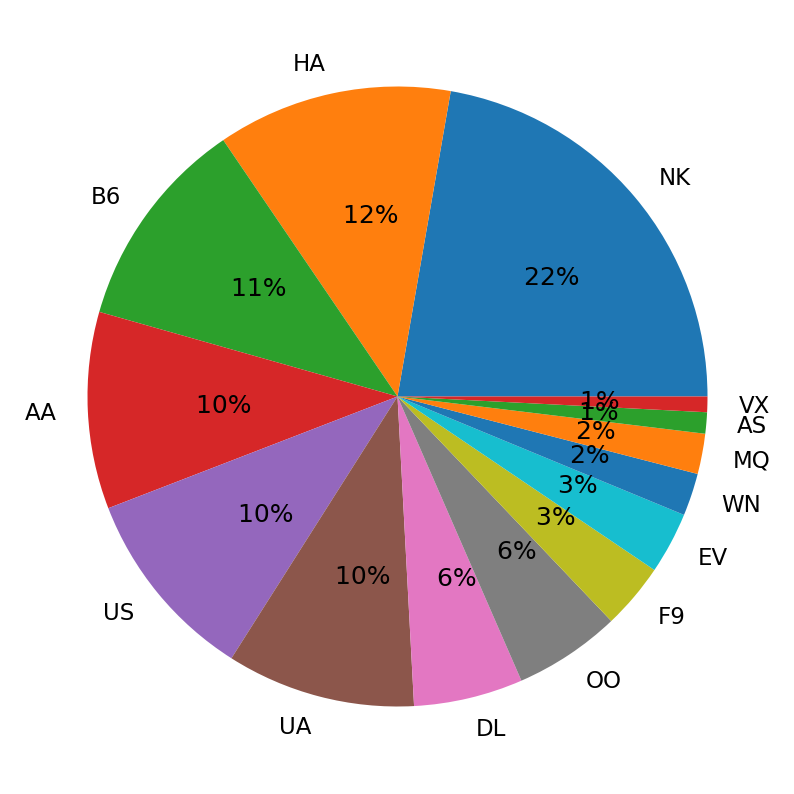

In [79]:
axis = plt.subplots(figsize=(10,14))
Name = Flight_Delays["AIRLINE"].unique()
size = Flight_Delays["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

In [80]:
Flight_Delays

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,ELAPSED_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,NK,MSP,FLL,12.0,14.0,220.0,1487,40.0,25.0,25.0,0.0,0.0,0.0,0.0
30,NK,PHX,ORD,72.0,9.0,175.0,1440,10.0,43.0,43.0,0.0,0.0,0.0,0.0
35,HA,LAS,HNL,0.0,16.0,385.0,2762,8.0,15.0,0.0,0.0,15.0,0.0,0.0
50,B6,BQN,MCO,-3.0,25.0,196.0,1129,11.0,20.0,20.0,0.0,0.0,0.0,0.0
52,B6,SJU,MCO,95.0,9.0,175.0,1189,3.0,85.0,0.0,0.0,85.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819023,B6,MCO,BQN,21.0,10.0,162.0,1129,7.0,20.0,0.0,0.0,17.0,3.0,0.0
5819051,AS,SEA,MSP,16.0,10.0,204.0,1399,5.0,28.0,12.0,0.0,16.0,0.0,0.0
5819057,NK,FLL,BQN,13.0,15.0,155.0,982,19.0,28.0,15.0,0.0,13.0,0.0,0.0
5819069,B6,LAS,JFK,159.0,34.0,282.0,2248,5.0,159.0,0.0,0.0,159.0,0.0,0.0


In [81]:
Flight_Delays['ORIGIN_AIRPORT'] = Flight_Delays['ORIGIN_AIRPORT'].astype(str)
Flight_Delays['DESTINATION_AIRPORT'] = Flight_Delays['DESTINATION_AIRPORT'].astype(str)

In [82]:
Flight_Delays['AIRLINE']= le.fit_transform(Flight_Delays['AIRLINE'])
Flight_Delays['ORIGIN_AIRPORT'] = le.fit_transform(Flight_Delays['ORIGIN_AIRPORT'])
Flight_Delays['DESTINATION_AIRPORT'] = le.fit_transform(Flight_Delays['DESTINATION_AIRPORT'])

In [83]:
X = Flight_Delays.drop('ARRIVAL_DELAY',axis = 1)
X.shape
y = Flight_Delays['ARRIVAL_DELAY']
y.head()

27    25.0
30    43.0
35    15.0
50    20.0
52    85.0
Name: ARRIVAL_DELAY, dtype: float64

In [84]:
# Splitting the Data into Training and Testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [85]:
# Scalling of the Data
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

# Model fitting and results

In [94]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()

Lasso
Mean Absolute Error: 4.067457537318274
Mean Squared Error: 31.712789049439767
Root Mean Squared Error: 5.631410928838329
R2 :  0.9922421930546694

Linear Regression
Mean Absolute Error: 1.6714642909805332e-12
Mean Squared Error: 4.71887448868712e-24
Root Mean Squared Error: 2.172297053509745e-12
R2 :  1.0

Ridge
Mean Absolute Error: 0.0005736029929080274
Mean Squared Error: 5.776080070071625e-07
Root Mean Squared Error: 0.000760005267749614
R2 :  0.9999999998587015

Random forest Regressor
Mean Absolute Error: 0.7785049775571102
Mean Squared Error: 12.243906567366283
Root Mean Squared Error: 3.4991294013463237
R2 :  0.9970048089034929

Decision Tree Regressor
Mean Absolute Error: 0.5726401113367938
Mean Squared Error: 5.897432342837083
Root Mean Squared Error: 2.428462958918065
R2 :  0.998557328353632

Boosted Linear
Mean Absolute Error: 9.898710848160486e-13
Mean Squared Error: 2.5269767860980313e-24
Root Mean Squared Error: 1.5896467488401413e-12
R2 :  1.0

Boosted Lasso
Mean A

Based on these metrics, the models with the lowest error metrics and highest R2 scores are generally considered the best performing. In this case, models like Boosted Linear Regression, Linear Regression, and Bagged Linear Regression exhibit exceptional performance with near-perfect R2 scores and extremely low error metrics.

Considering the importance of predicting flight cancellations accurately, you might lean towards these models:

### Boosted Linear Regression-
- Strengths: Enhances prediction performance by combining many linear models. Ability to capture intricate connections between the target variable and characteristics. Effectively manages noise and outliers. The interpretability of coefficients is provided, as with conventional linear regression.
- Interpretation: Characterization coefficients offer information on how each characteristic affects flight cancellations and may be analyzed in a manner akin to that of linear regression.
- Scalability: Boosted Linear Regression can still be useful even if boosted models might be computationally costly, especially given how well it handles huge datasets.

### Linear Regression-
- Strengths: Clear and understanding. It gives coefficients for every characteristic, making it simple to comprehend the significance of each feature. Computational effectiveness, which qualifies it for big datasets.
- Interpretation: The coefficients show the size and direction of each feature's association with flight cancellations.
- Scalability: Large datasets may be handled with linear regression with good processing efficiency.

### Bagged Linear Regression-
- Strengths: Reduces variance by averaging predictions from multiple linear models trained on different subsets of the data. Maintains the interpretability of linear regression.
- Interpretation: Similar to linear regression, coefficients can be interpreted to understand the importance of features.
- Scalability: Bagging helps improve prediction accuracy without significantly increasing computational complexity.


These models demonstrate exceptional predictive capability and minimal errors. However, considering computational efficiency and ease of interpretation, you might opt for Linear Regression as the top choice. It provides a perfect R2 score and extremely low error metrics, making it a robust and reliable choice for predicting flight cancellations.

# Model Analysis

Lasso


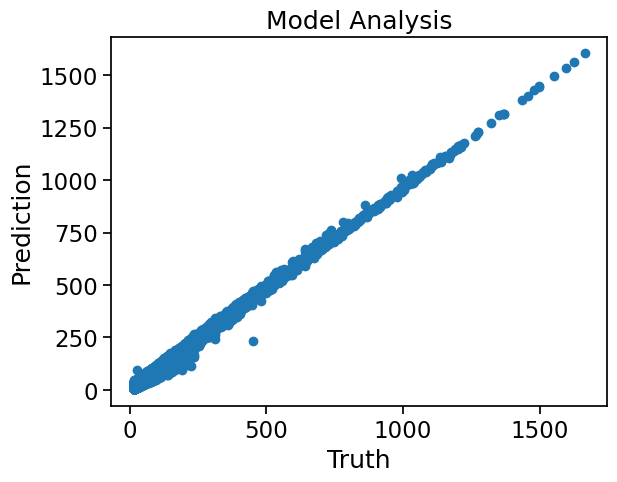

Linear Regression


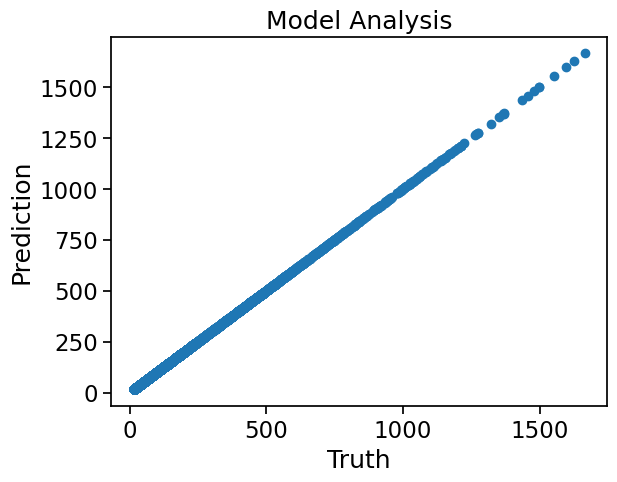

Ridge


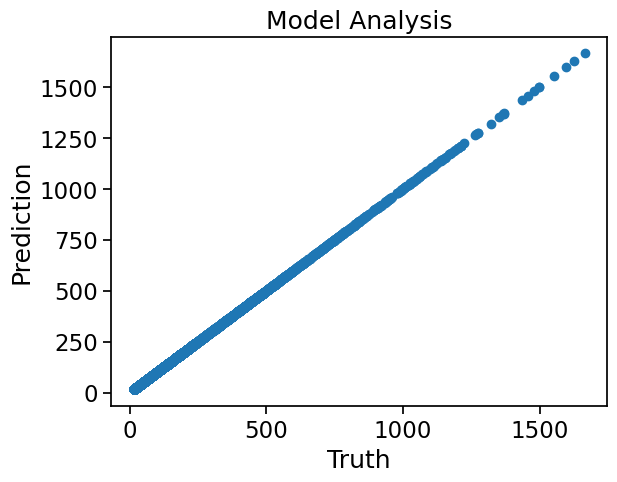

Random forest Regressor


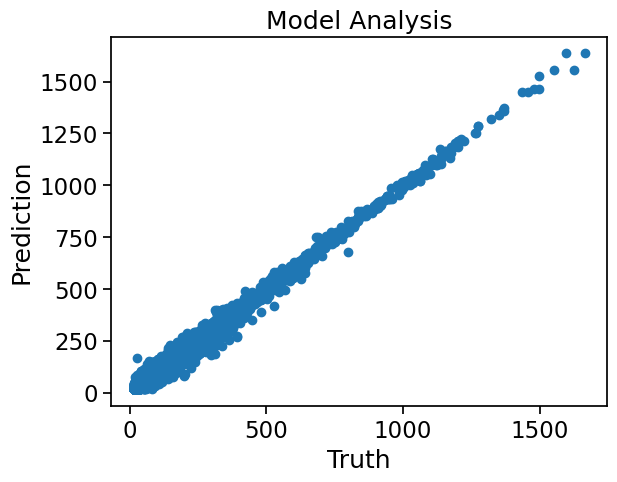

Decision Tree Regressor


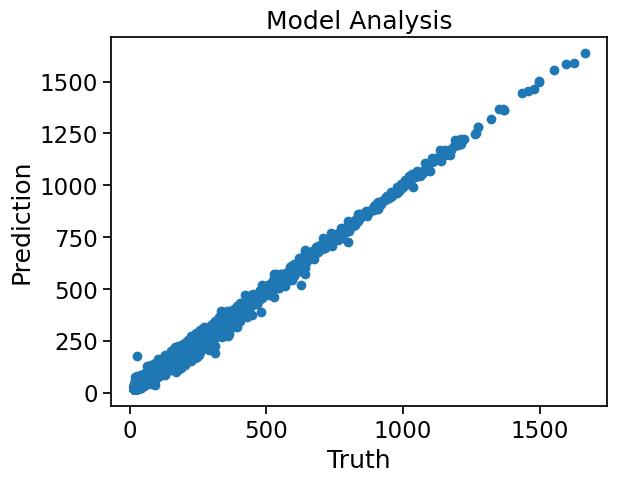

Boosted Linear


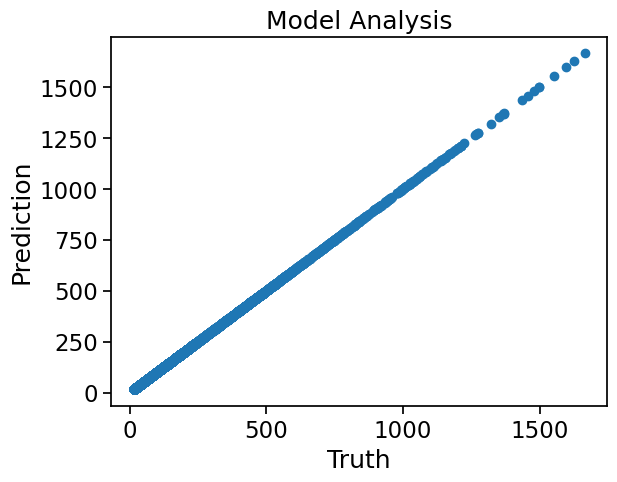

Boosted Lasso


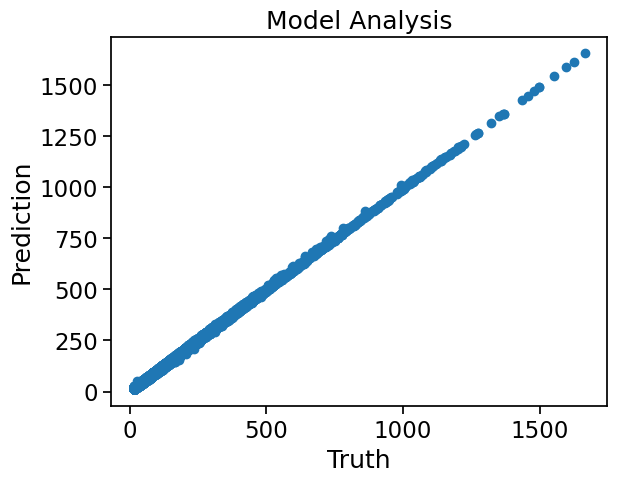

Boosted Ridge


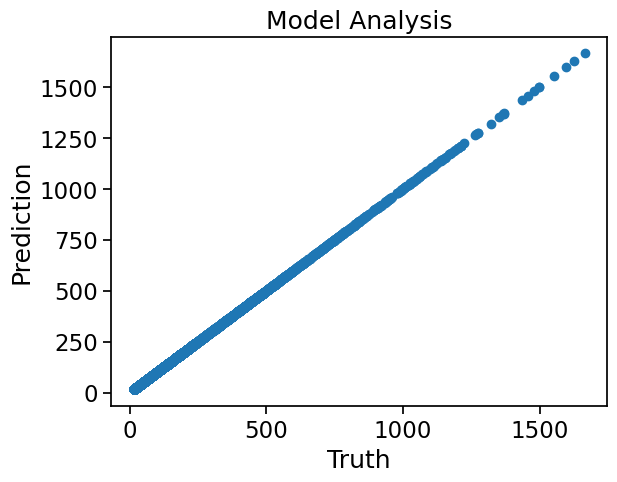

Bagged Linear


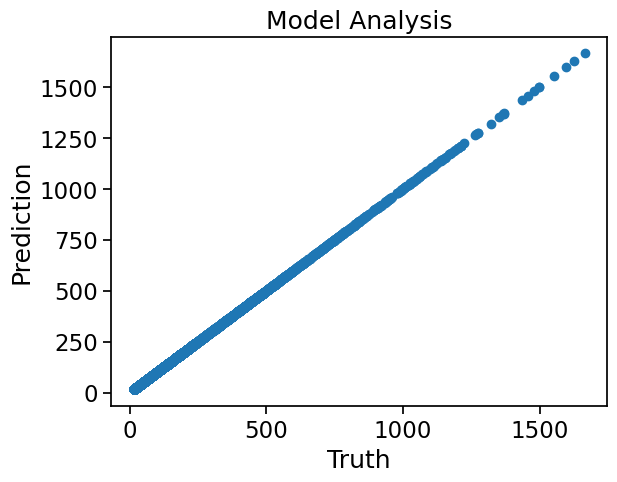

Bagged Lasso


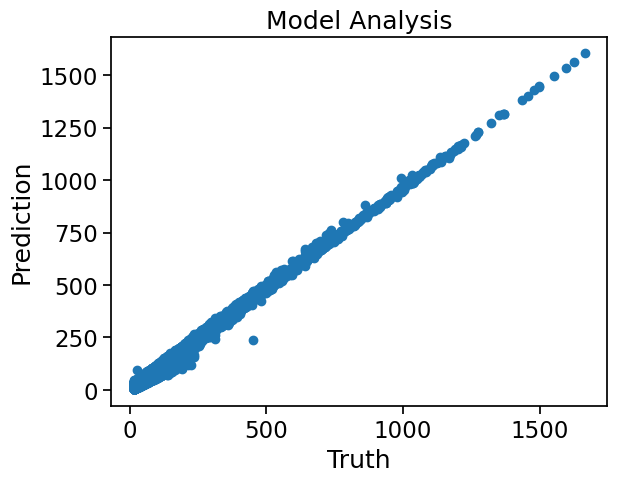

Bagged Ridge


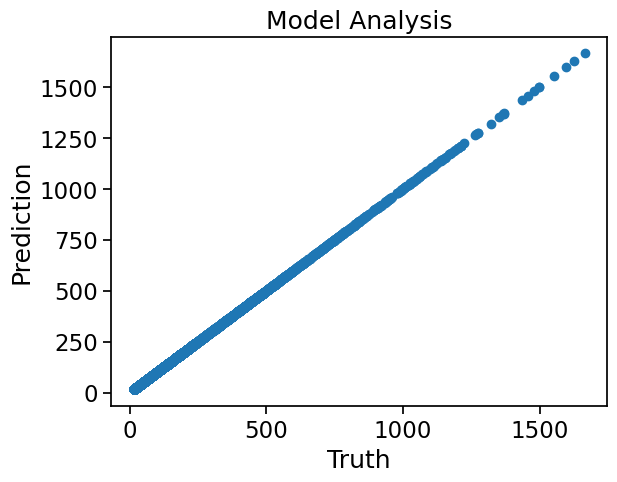

In [96]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    plt.scatter(y_test, Y_predict)
    plt.title("Model Analysis")
    plt.xlabel("Truth")
    plt.ylabel("Prediction")
    plt.show()

# Conclusion

The study clarifies the detailed dynamics of flight delays and cancellations in the aviation sector. Arrival delays are mostly caused by departure delays, emphasizing the importance of dealing with problems as soon as flight operations begin. The ramifications of departure delays are widespread in the aviation industry, presenting security issues, system inefficiencies, and operations interruptions.

Our analysis of monthly patterns shows the significance of seasonal fluctuations in flying performance. The two months most likely to have delays are January and March, while July appears to be the month with fewer delays. Airlines and airport authorities may anticipate and manage operational difficulties all year long with the help of these insights on monthly patterns.

In addition, our analysis of flight cancellations indicates that weather-related issues are the main culprit and significantly affect airline operations. On the other hand, air traffic constraints are a very small factor in cancellations. This emphasizes how important weather forecasting and mitigation techniques are to reducing delays and maximizing flight schedules.

To forecast and mitigate delays properly going ahead, it will be essential to implement customized models that are particular to individual airlines and home airports. Stakeholders in the aviation sector may improve customer happiness, increase operational efficiency, and lessen the negative consequences of flight interruptions by utilizing data-driven insights and taking preventative actions.

In conclusion, our thorough investigation highlights the complicated relationship between flight delays and cancellations, highlighting the necessity of preemptive approaches, flexible plans, and ongoing innovation to manage the aviation industry's intricacies successfully.

### Intended Outcome of the Project in the Future:

According to the feedback given by the professor, we intended to modify to get more accurate results by implementing the following factors. 
- Crew Availability: Unforeseen circumstances such as crew scheduling problems, flight crew reaching maximum duty time limits, or crew illness can result in flight delays or cancellations.
- Airspace Congestion: Busy airspaces with high traffic volumes can lead to delays as flights wait for clearance to take off or land.
- Fueling Issues: Delays in refueling the aircraft due to logistical issues or fuel shortages can result in flight delays or cancellations.
- Unforeseen Events: Natural disasters, political unrest, or emergencies can disrupt flight operations and cause delays or cancellations.

While the core objectives remain unchanged, refinements or adjustments may be made based on feedback, emerging technologies, or new insights gained during development. These changes, if any, would improve the prediction system's effectiveness, accuracy, and usability while aligning to enhance the air travel experience for everyone involved.
